### Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data into a dataframe
data = pd.read_csv("Supermarket_sales_prediction.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### EDA for BigMart Sales Data

In [3]:
data.shape

(8523, 12)

In [4]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


<Axes: xlabel='Item_Fat_Content'>

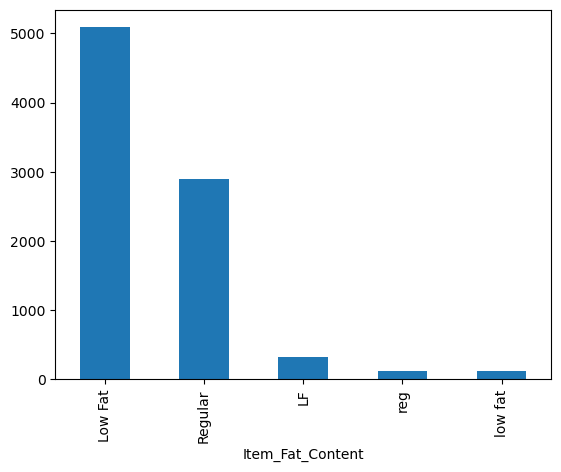

In [7]:
data['Item_Fat_Content'].value_counts().plot(kind='bar')

<Axes: xlabel='Outlet_Type'>

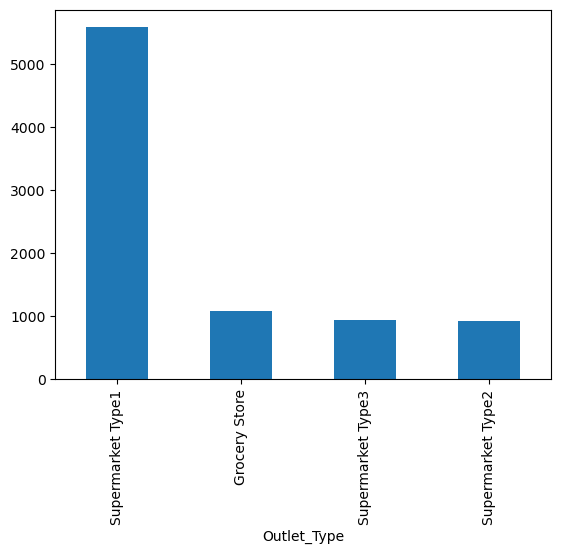

In [8]:
data['Outlet_Type'].value_counts().plot(kind='bar')

In [9]:
data.Item_Fat_Content.value_counts(normalize=True)*100

Item_Fat_Content
Low Fat    59.709023
Regular    33.896515
LF          3.707615
reg         1.372756
low fat     1.314091
Name: proportion, dtype: float64

As we see here we have a case sensitivity problem here where Low Fat is divided in to Low Fat, LF, low fat.

In [10]:
data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [11]:
data.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [12]:
pd.set_option("display.max_columns",None)

In [13]:
df = data.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Type'].count()
df

Outlet_Identifier  Item_Type    
OUT010             Baking Goods      42
                   Breads            17
                   Breakfast          9
                   Canned            35
                   Dairy             43
                                   ... 
OUT049             Others            17
                   Seafood            7
                   Snack Foods      139
                   Soft Drinks       46
                   Starchy Foods     17
Name: Item_Type, Length: 160, dtype: int64

In [14]:
data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [15]:
data.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [16]:
data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [17]:
data.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.96,.97,.98,.99]).style.background_gradient()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
1%,5.150000,0.000000,35.062752,1985.000000,83.890800
2%,5.440000,0.000000,37.219000,1985.000000,115.476352
3%,5.655000,0.000000,38.750600,1985.000000,145.583828
4%,5.820000,0.000000,40.466096,1985.000000,169.699104
5%,5.945000,0.000000,42.516700,1985.000000,188.421400
25%,8.773750,0.026989,93.826500,1987.000000,834.247400


### Showing count plot of items that contain fats type :-

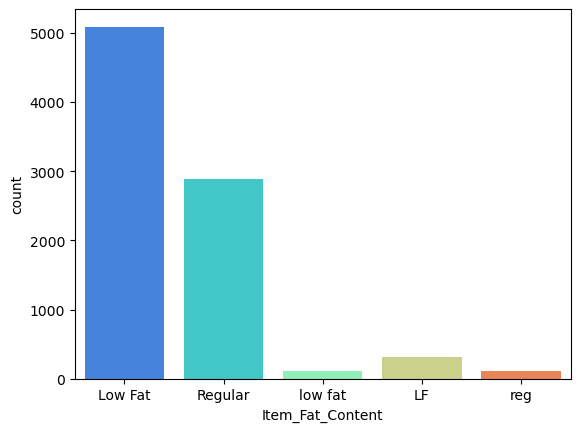

In [18]:
sns.countplot(data=data,x='Item_Fat_Content', palette='rainbow');

### Violin plot between 'Item_Fat_Content' and 'Item_Outlet_Sales'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


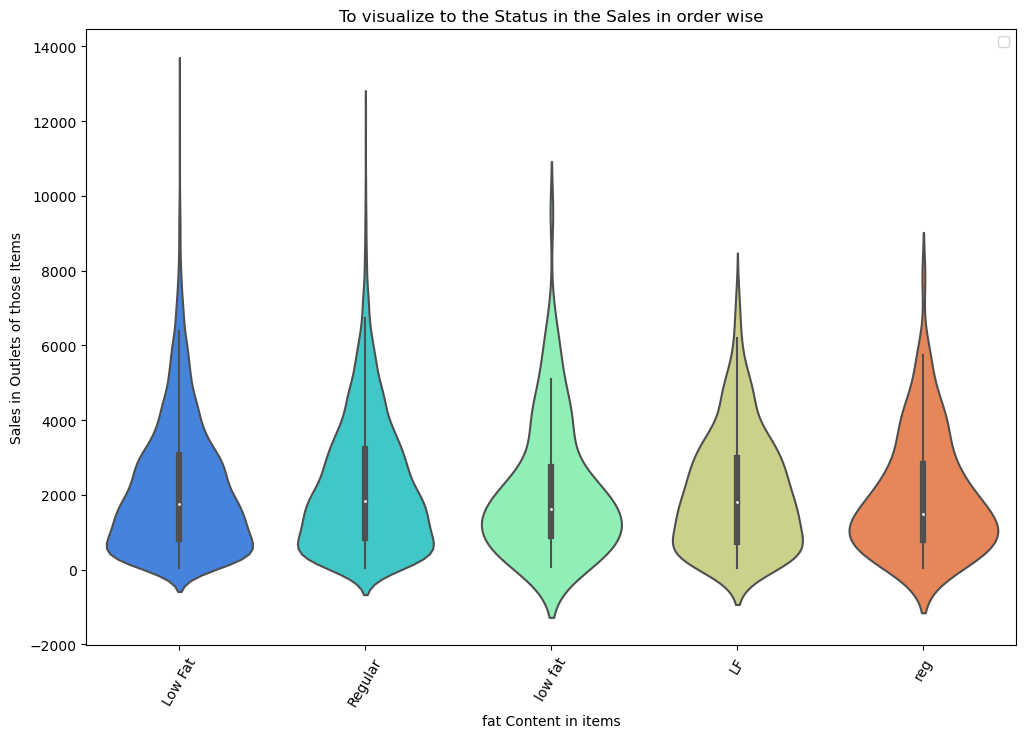

In [19]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x='Item_Fat_Content',y='Item_Outlet_Sales',palette='rainbow')
plt.xlabel('fat Content in items')
plt.ylabel('Sales in Outlets of those Items')
plt.xticks(rotation=60)
plt.title('To visualize to the Status in the Sales in order wise')
plt.legend()
plt.show();

In [20]:
fat_cont = {'low fat' : 'Low Fat',
                     'LF':'Low Fat',
                      'reg':'Regular',
                       'Low Fat':'Low Fat',
                       'Regular':'Regular'}

data["Item_Fat_Content"] = data["Item_Fat_Content"].map(fat_cont)

In [21]:
data["Item_Fat_Content"].value_counts(normalize=True)

Item_Fat_Content
Low Fat    0.647307
Regular    0.352693
Name: proportion, dtype: float64

In [22]:
for i in data["Item_Visibility"]:
    print(i)

0.016047301
0.019278216
0.016760075
0.0
0.0
0.0
0.012741089
0.127469857
0.016687114
0.09444959
0.0
0.045463773
0.1000135
0.047257328
0.0680243
0.069088961
0.008596051
0.069196376
0.034237682
0.10249212
0.138190277
0.035399923
0.025698134
0.057556998
0.025896485
0.099887103
0.066693437
0.019356132
0.161466534
0.072221801
0.170348551
0.080829372
0.0
0.0
0.097904029
0.089291137
0.059511812
0.113123893
0.123111453
0.026480954
0.102511504
0.02681843
0.117818348
0.069102831
0.042277867
0.089498926
0.0
0.025879577
0.121632721
0.255394896
0.067779712
0.159803853
0.028696932
0.065041581
0.028760013
0.010053105
0.048157338
0.071958197
0.173481304
0.061082177
0.0
0.040071131
0.012090074
0.15028599
0.026015519
0.195068226
0.033082215
0.078946455
0.041700756
0.143422643
0.105296072
0.121531501
0.0
0.011324862
0.186357148
0.024205661
0.033230816
0.113720344
0.112556507
0.0
0.059352241
0.014087057
0.045230944
0.293417759
0.031382044
0.12639886
0.025403898
0.039057677
0.123115764
0.039624006
0.0404211

In [23]:
data["Item_Visibility"] = data["Item_Visibility"].replace(0,np.nan)

In [24]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
data["Item_Visibility"].mean()

0.07048184085069402

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


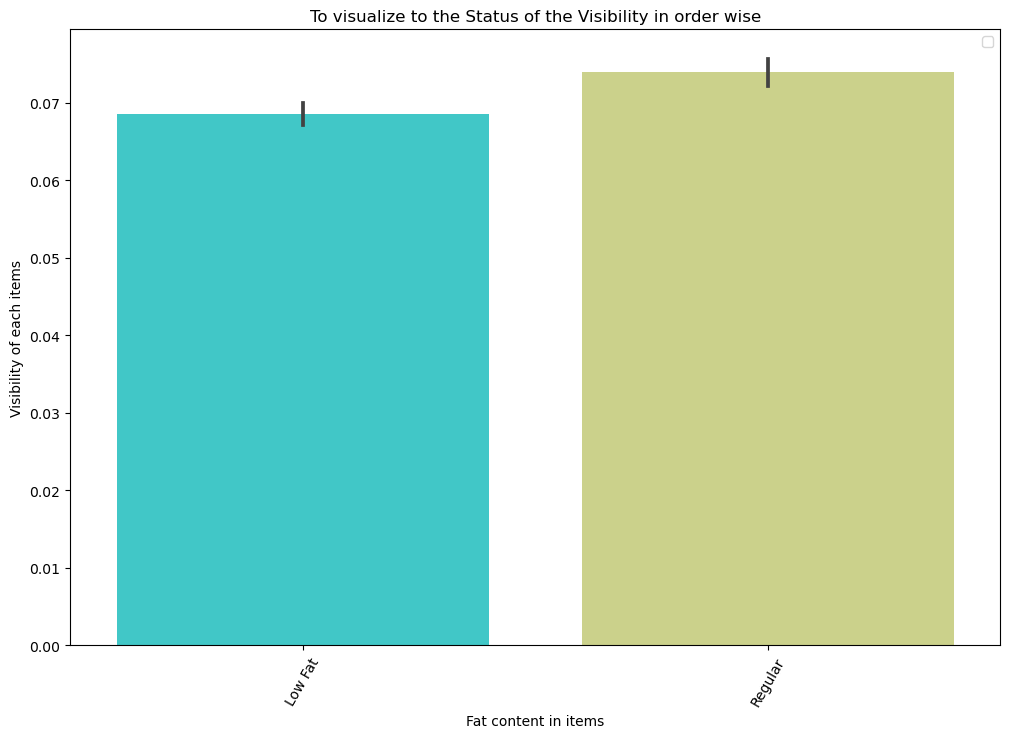

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=data,x='Item_Fat_Content', y ='Item_Visibility',palette='rainbow')
plt.xlabel('Fat content in items')
plt.ylabel('Visibility of each items')
plt.xticks(rotation=60)
plt.title('To visualize to the Status of the Visibility in order wise')
plt.legend()
plt.show();

The count of Regular products is sligtly higher than Low fat products

### Pie Plot

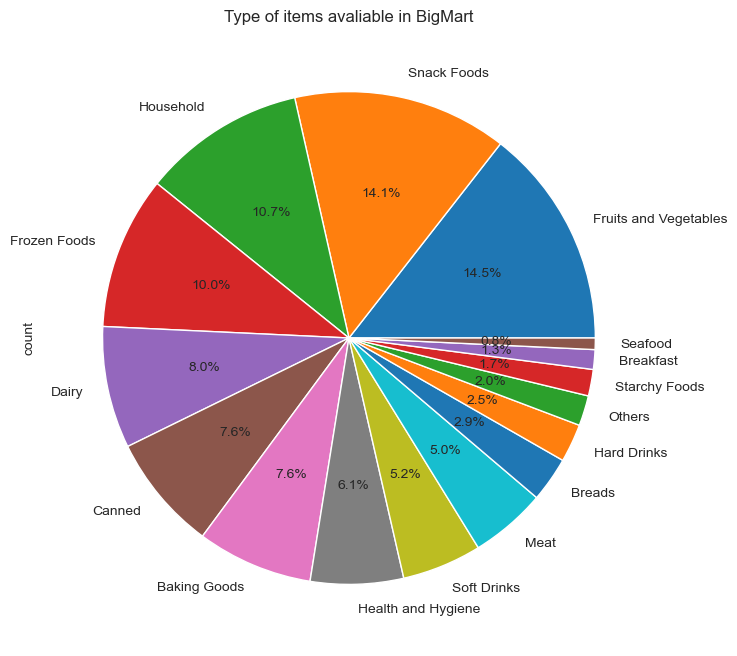

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
data['Item_Type'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('Type of items avaliable in BigMart')
plt.show()

This plot illustrates which items sell the most at the supermarket. Fruits and vegetables are top sellers, while seafood sells the least.

In [28]:
data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


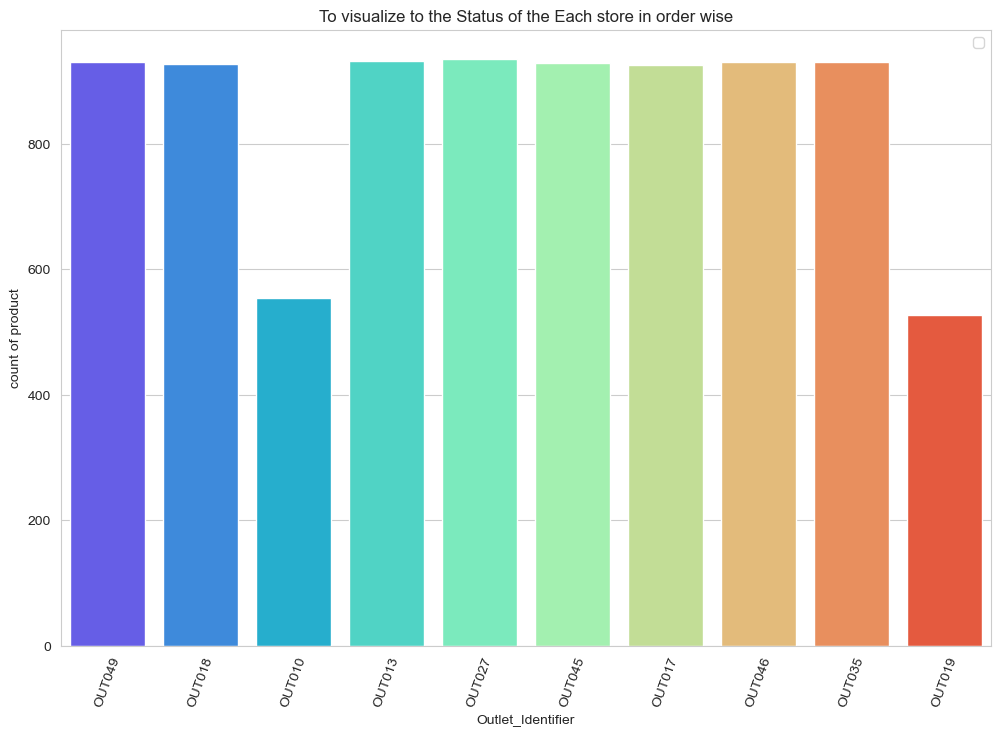

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='Outlet_Identifier',palette='rainbow')
plt.xlabel('Outlet_Identifier')
plt.ylabel('count of product')
plt.xticks(rotation=70)
plt.title('To visualize to the Status of the Each store in order wise')
plt.legend()
plt.show();

This store can help to visualize the distribution and relationship between product and outlet.

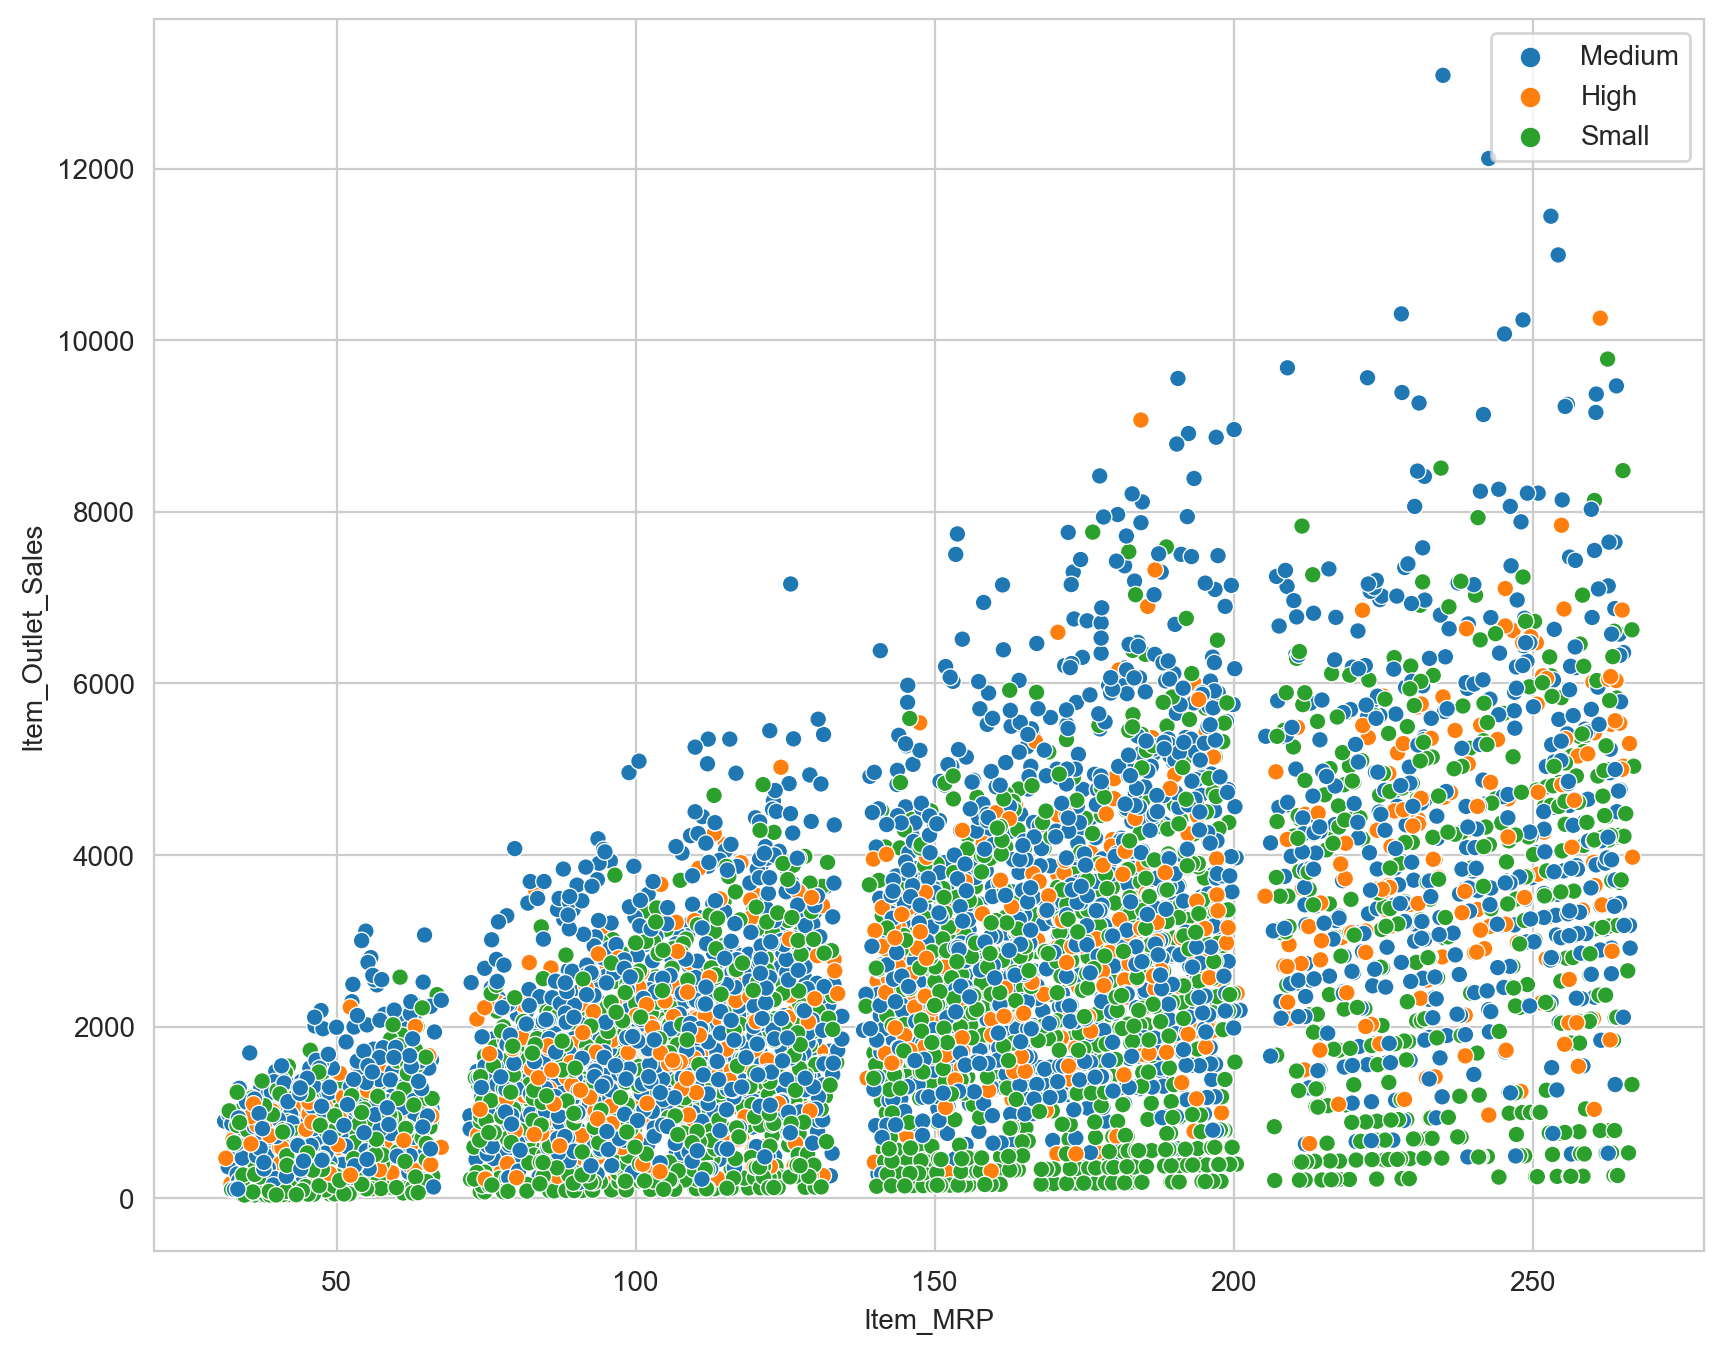

In [30]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=data,x='Item_MRP',y='Item_Outlet_Sales',hue="Outlet_Size")
plt.legend()
plt.show()

Even if the MRP is greater than Item Outlet Sales is medium and high. If the MRP is Low, item sales are low.

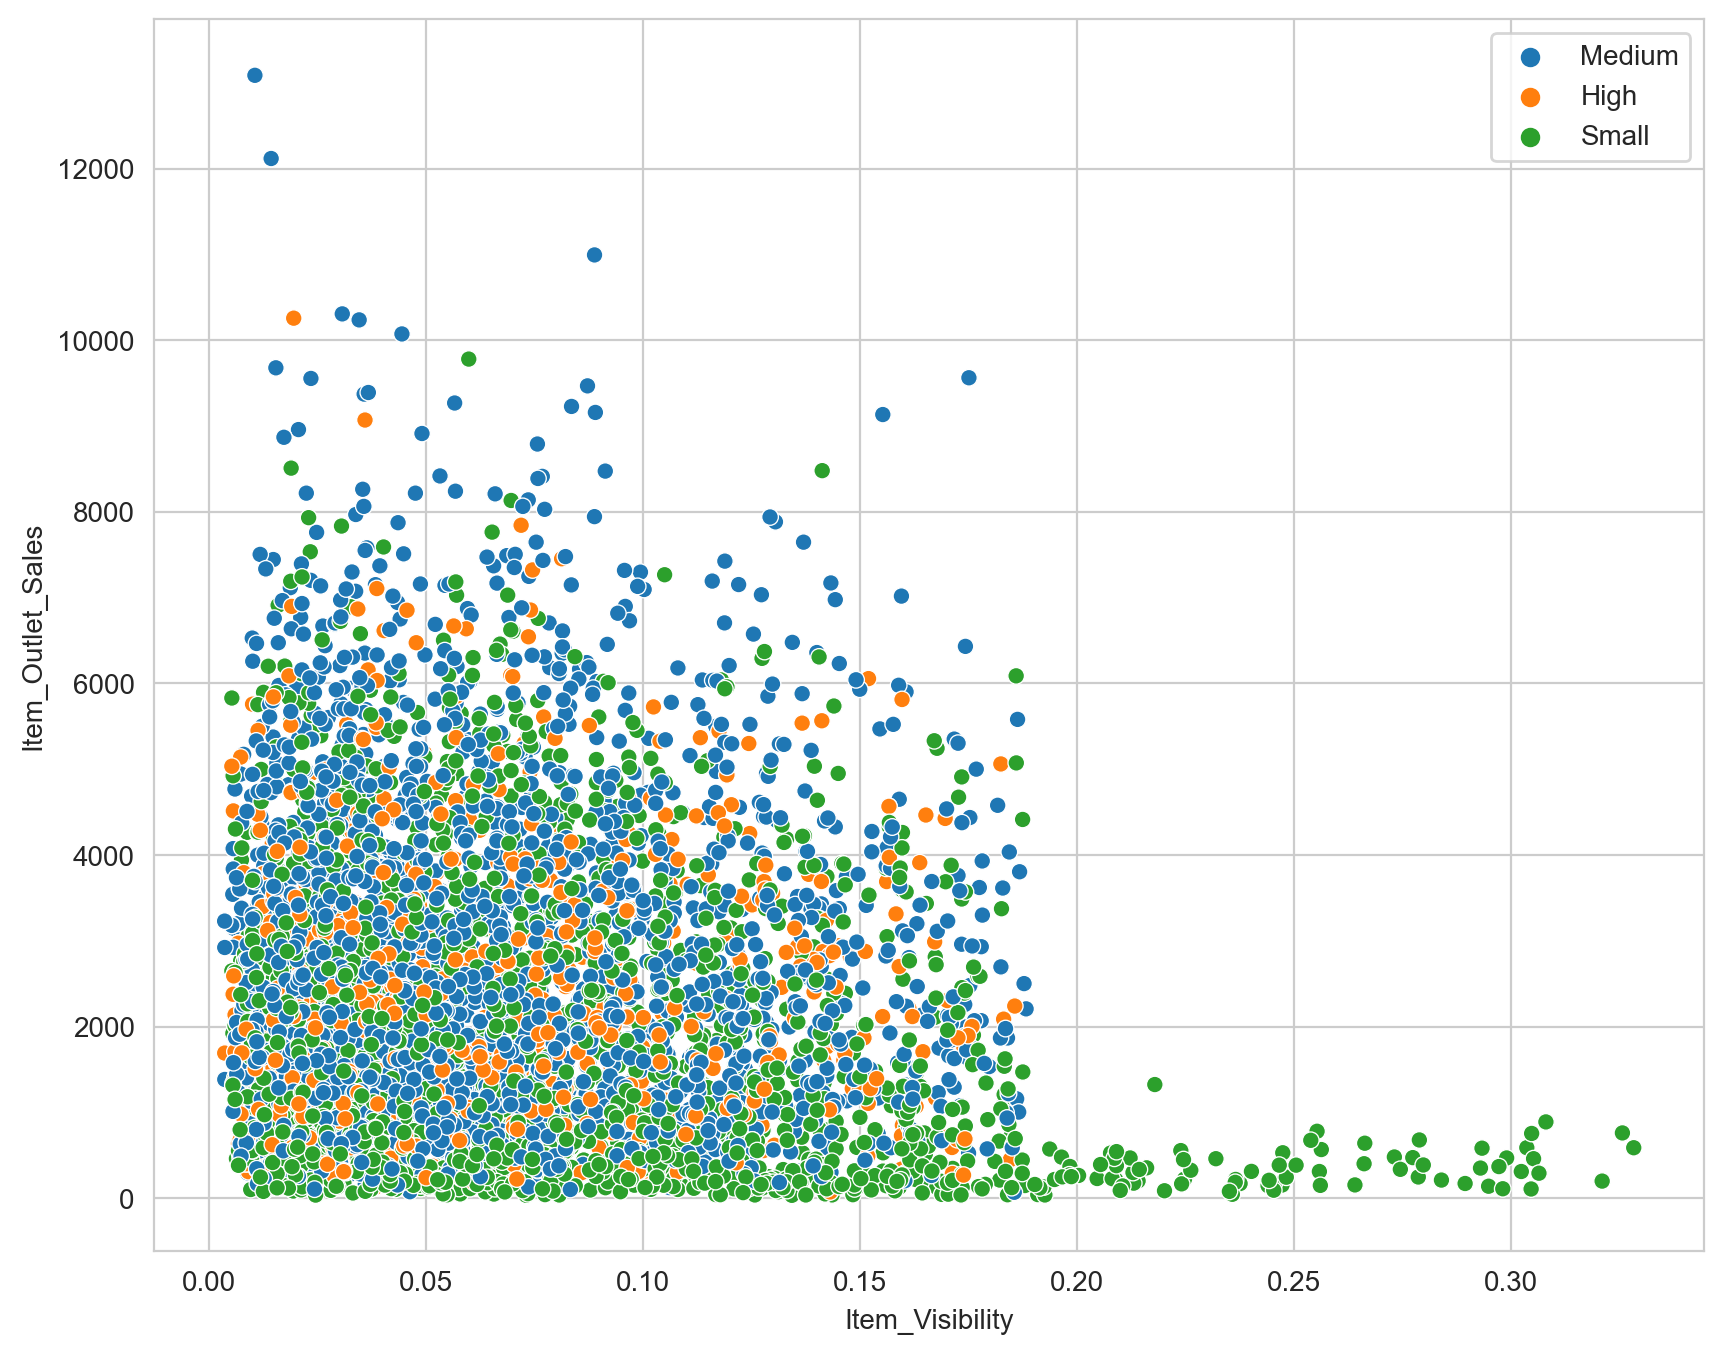

In [31]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=data,x='Item_Visibility',y='Item_Outlet_Sales',hue="Outlet_Size")
plt.legend()
plt.show()

### Treating Missing Value

In [32]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [34]:
data['Outlet_Size'].fillna('Medium', inplace=True)

In [35]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2) 
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2) 
    q2=round(data[x].quantile(.5), 2) 
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
            "var":var, "std":std, "range":range1, "q1":q1, "q2":q2, "q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.distplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

C:\Users\Yesh Damania\AppData\Local\Temp\ipykernel_22864\262825380.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x])
C:\Users\Yesh Damania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


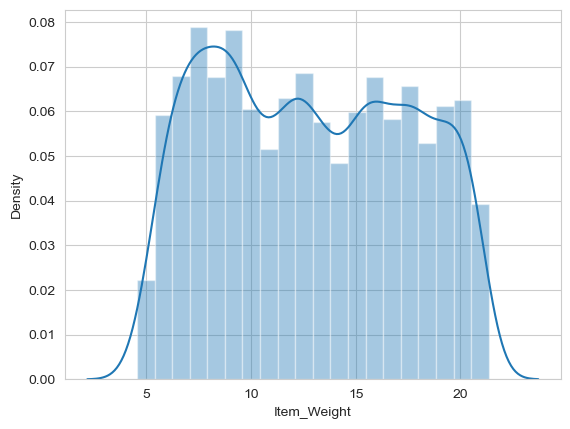

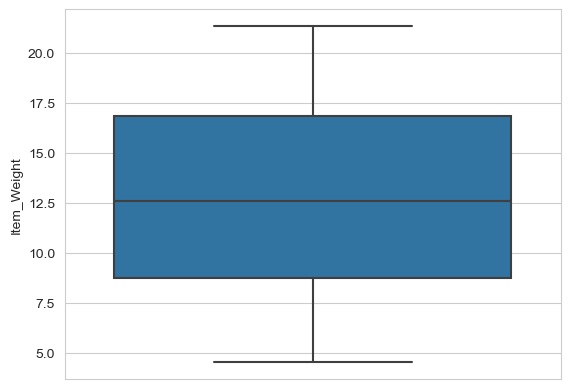

{'missing': 1463,
 'min': 4.55,
 'max': 21.35,
 'mean': 12.86,
 'var': 21.56,
 'std': 4.64,
 'range': 16.8,
 'q1': 8.77,
 'q2': 12.6,
 'q3': 16.85,
 'skewness': 0.08,
 'kurtosis': -1.23}

In [37]:
univariate_num(data=data,x='Item_Weight')

In [38]:
data['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [39]:
mode=data['Item_Weight'].mode()[0]
mode

12.15

Mean and mode are close to each other

In the given situation where adictonary contains statstical summary value, and one of the values is "NaN" you may consider the following option for replacing the "NaN" value:

### Data Imputation Technique

In [40]:
data['Item_Weight'].fillna(mode, inplace=True)

In [41]:
data['Item_Weight'].value_counts()

Item_Weight
12.150    1549
17.600      82
13.650      77
11.800      76
9.300       68
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: count, Length: 415, dtype: int64

In [42]:
data.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

C:\Users\Yesh Damania\AppData\Local\Temp\ipykernel_22864\262825380.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x])
C:\Users\Yesh Damania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


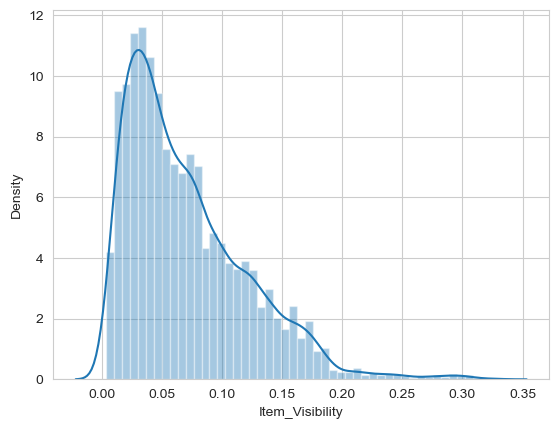

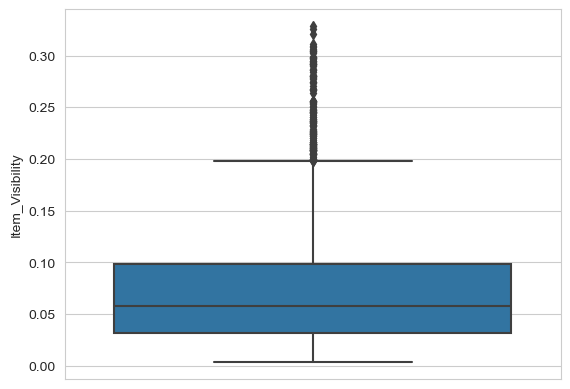

{'missing': 526,
 'min': 0.0,
 'max': 0.33,
 'mean': 0.07,
 'var': 0.0,
 'std': 0.05,
 'range': 0.33,
 'q1': 0.03,
 'q2': 0.06,
 'q3': 0.1,
 'skewness': 1.23,
 'kurtosis': 1.85}

In [43]:
univariate_num(data=data,x='Item_Visibility')

The above graph follows a Normal Distribution Curve, which is Right skewed and leptocurtic in nature, it follows a missing value of 526.

In [44]:
data['Item_Visibility'].median()

0.057792343

In [45]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

C:\Users\Yesh Damania\AppData\Local\Temp\ipykernel_22864\262825380.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x])
C:\Users\Yesh Damania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


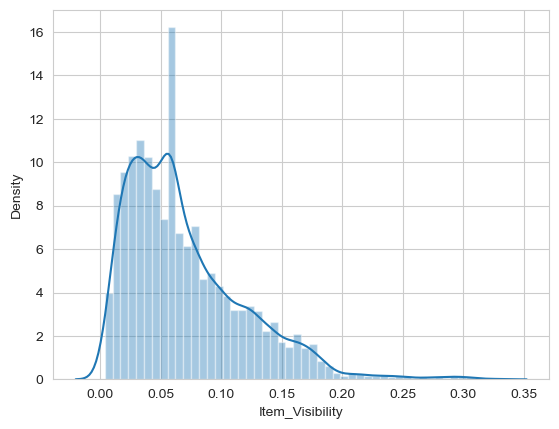

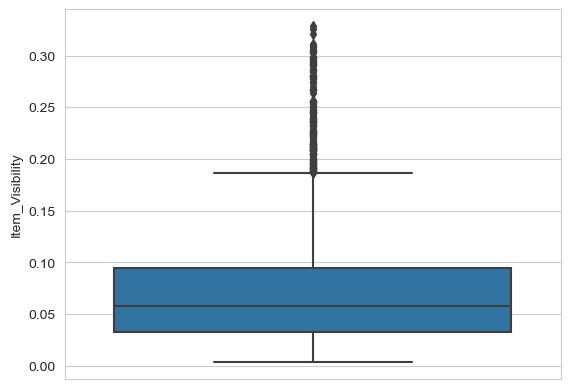

{'missing': 0,
 'min': 0.0,
 'max': 0.33,
 'mean': 0.07,
 'var': 0.0,
 'std': 0.05,
 'range': 0.33,
 'q1': 0.03,
 'q2': 0.06,
 'q3': 0.09,
 'skewness': 1.31,
 'kurtosis': 2.21}

In [46]:
univariate_num(data=data,x='Item_Visibility')

In [47]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have treated the missing value for Item_Visibility

### Data Preprocessing 

In [48]:
data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [49]:
data.drop(columns=['Item_Identifier'],inplace=True)

In [50]:
data.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.96,.97,.98,.99]).style.background_gradient()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,0.069699,140.992782,1997.831867,2181.288914
std,4.234540,0.048826,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
1%,5.175000,0.007351,35.062752,1985.000000,83.890800
2%,5.485000,0.009617,37.219000,1985.000000,115.476352
3%,5.780000,0.010913,38.750600,1985.000000,145.583828
4%,5.940000,0.012198,40.466096,1985.000000,169.699104
5%,6.130000,0.013486,42.516700,1985.000000,188.421400
25%,9.310000,0.033085,93.826500,1987.000000,834.247400


In [51]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [52]:
# For converting to numerical data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    data[x]=le.fit_transform(data[x])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Item_Fat_Content
mapping {'Low Fat': 0, 'Regular': 1}
Feature Item_Type
mapping {'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}
Feature Outlet_Identifier
mapping {'OUT010': 0, 'OUT013': 1, 'OUT017': 2, 'OUT018': 3, 'OUT019': 4, 'OUT027': 5, 'OUT035': 6, 'OUT045': 7, 'OUT046': 8, 'OUT049': 9}
Feature Outlet_Size
mapping {'High': 0, 'Medium': 1, 'Small': 2}
Feature Outlet_Location_Type
mapping {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
Feature Outlet_Type
mapping {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


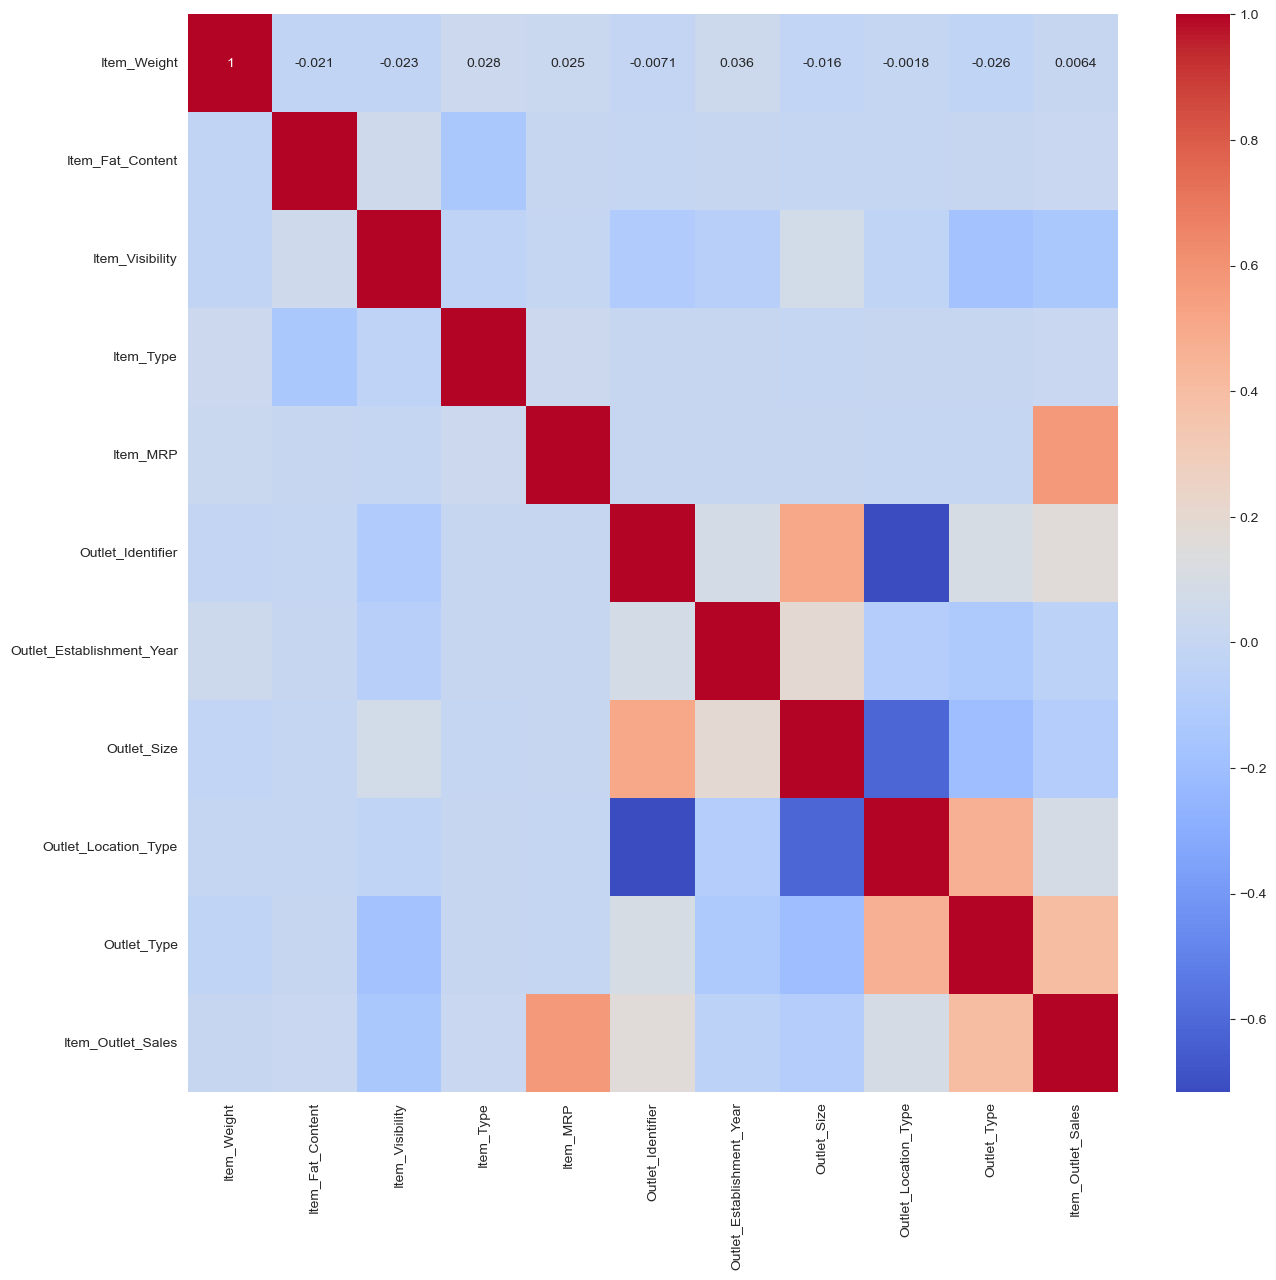

In [53]:
plt.figure(figsize=(15,14))
cr=data.corr()
sns.heatmap(cr, cmap='coolwarm',annot=True)
plt.show()

The data is not that related to each other. Item_Visibility is negatively related to the maximum column

### Modelling with ML algorithms

In [54]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.057792,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.057792,9,53.8614,1,1987,0,2,1,994.7052


In [55]:
y=data['Item_Outlet_Sales']
x=data.drop(columns=['Item_Outlet_Sales'])

In [56]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,  # Default value -> test_size= 0.25
                                                    random_state=100)

In [58]:
X_train.shape

(6392, 10)

In [59]:
X_test.shape

(2131, 10)

### Assigning Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [61]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [62]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

In [63]:
r2 = r2_score(Y_test, Y_test_pred)

MeanSquare = mean_squared_error(Y_test, Y_test_pred)

rmse = np.sqrt(MeanSquare)

MeanAbsolute = mean_absolute_error(Y_test, Y_test_pred)

print('r2=', r2)
print('MeanSquare = ',MeanSquare)
print('MeanAbsolute = ',MeanAbsolute)
print('RMSE= ',rmse)

r2= 0.4934590978513155
MeanSquare =  1452165.7443151295
MeanAbsolute =  906.9941427179475
RMSE=  1205.0583987156513


In [64]:
print("Training:",lr.score(X_train,Y_train))
print("Testing:",lr.score(X_test,Y_test))

Training: 0.5156523717042178
Testing: 0.4934590978513155


### Assigning Decision Tree Regression model

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [66]:
modeldt = DecisionTreeRegressor()
modeldt.fit(X_train,Y_train)

Y_pred = modeldt.predict(X_test)

In [67]:
r2 = r2_score(Y_test, Y_pred)

MeanSquare = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(MeanSquare)

MeanAbsolute = mean_absolute_error(Y_test, Y_pred)

print('r2=', r2)
print('MeanSquare = ',MeanSquare)
print('MeanAbsolute = ',MeanAbsolute)
print("RMSE =",rmse)

r2= 0.13708566420060464
MeanSquare =  2473827.154748709
MeanAbsolute =  1088.5867492257155
RMSE = 1572.840473394778


In [68]:
modeldt.score(X_train,Y_train)

1.0

The decision Tree is performing good in training data and poorly on Testing data. The rmse is greater than the linear model

### Assigning random Forest Regression model

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [70]:
modeldt = RandomForestRegressor(n_estimators=100, random_state=42)
modeldt.fit(X_train,Y_train)

# Make Predictions
Y_pred = modeldt.predict(X_test)

# Calculate Accuracy
r2 = r2_score(Y_test, Y_pred)

MeanSquare = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(MeanSquare)

MeanAbsolute = mean_absolute_error(Y_test, Y_pred)

print('r2=', r2)
print('MeanSquare = ',MeanSquare)
print('MeanAbsolute = ',MeanAbsolute)
print("RMSE =",rmse)

r2= 0.55228129305534
MeanSquare =  1283532.6161346352
MeanAbsolute =  801.2427879371188
RMSE = 1132.9309847182374


In [71]:
modeldt.score(X_train,Y_train)

0.937835686472168

It is a good model but training and testing score are still greater

### Conclusion
We tried different models, and the random forest one stood out. It gave better predictions overall, meaning it was closer to the actual sales numbers, making it the best choice for helping us understand and improve supermarket sales.